## Import commands

In [219]:
import numpy as np
import  pandas as pd
import scipy
from scipy import stats
from scipy.stats import norm,t

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from statsmodels import stats
import statsmodels
from statsmodels import stats



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from scipy.stats import ttest_ind
import os

In [180]:
os.getcwd()

'C:\\Users\\Shubham\\Desktop\\Stats'

## importing data

In [181]:
df=pd.read_csv('data.csv') 

In [182]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [183]:
df.info()    # checking the data type of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [184]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
## checking null values in dataset

In [185]:
df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [186]:
df.shape     # number of rows and columns

(6819, 96)

In [187]:
# checking the duplicate values 
dupl_row=df[df.duplicated()]
print(dupl_row)

Empty DataFrame
Columns: [Bankrupt?, ROA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax, ROA(B) before interest and depreciation after tax, Operating Gross Margin, Realized Sales Gross Margin, Operating Profit Rate, Pre-tax net Interest Rate, After-tax net Interest Rate, Non-industry income and expenditure/revenue, Continuous interest rate (after tax), Operating Expense Rate, Research and development expense rate, Cash flow rate, Interest-bearing debt interest rate, Tax rate (A), Net Value Per Share (B), Net Value Per Share (A), Net Value Per Share (C), Persistent EPS in the Last Four Seasons, Cash Flow Per Share, Revenue Per Share (Yuan ¥), Operating Profit Per Share (Yuan ¥), Per Share Net profit before tax (Yuan ¥), Realized Sales Gross Profit Growth Rate, Operating Profit Growth Rate, After-tax Net Profit Growth Rate, Regular Net Profit Growth Rate, Continuous Net Profit Growth Rate, Total Asset Growth Rate, Net Value Growth Rate, Total 

In [188]:
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [223]:


df.columns = [ 'Bankrupt','Cost of Interest-bearing Debt',
'Cash Reinvestment Ratio',
'Current Ratio',
'Acid Test',
'Interest Expenses/Total Revenue',
'Total Liability/Equity Ratio',  
'Liability/Total Assets',
'Interest-bearing Debt/Equity',
'Contingent Liability/Equity',
'Operating Income/Capital',
'Pretax Income/Capital',
'Working Capital to Total Assets',
'Quick Assets/Total assets',
'Current Assets/Total Assets',
'Cash/Total Assets',
'Quick Assets/Current Liability',
'Cash/Current Liability',
'Current Liability to Assets',
'Operating Funds to Liability',
'Inventory/Working Capital',
'Inventory/Current Liability',
    'Current Liabilities/Liability',
    'Working Capital/Equity',
    'Current Liabilities/Equity',
'Long-term Liability to Current Assets',
    'Current Liability to Current Assets',
    'One if Total Liability exceeds Total Assets',
    'Equity to Liability',
    'Equity/Total Assets',
    '(Long-term Liability+Equity)/Fixed Assets',
    'Fixed Assets to Assets',
    'Current Liability to Liability',
    'Current Liability to Equity',
    'Equity to Long-term Liability',
    'Liability to Equity',
    'Degree of Financial Leverage',
    'Interest Coverage Ratio',
    'Operating Expenses/Net Sales',
    '(Research and Development Expenses)/Net Sales',
    'Effective Tax Rate',
    'Book Value Per Share(B)',
    'Book Value Per Share(A)',
    'Book Value Per Share(C)',
    'Cash Flow Per Share',
    'Sales Per Share',
    'Operating Income Per Share',
    'Sales Per Employee',
    'Operation Income Per Employee',
'Fixed Assets Per Employee',
    'total assets to GNP price',
'Return On Total Assets(C)',
'Return On Total Assets(A)',
'Return On Total Assets(B)',
'Gross Profit /Net Sales',
'Realized Gross Profit/Net Sales',
'Operating Income /Net Sales',
'Pre-Tax Income/Net Sales',
'Net Income/Net Sales',
'Net Non-operating Income Ratio',
'Net Income-Exclude Disposal Gain or Loss/Net Sales',
'EPS-Net Income',
'Pretax Income Per Share',
'Retained Earnings to Total Assets',
'Total Income to Total Expenses',
'Total Expenses to Assets',
'Net Income to Total Assets',
'Gross Profit to Sales',
'Net Income to Stockholders Equity',
'One if Net Income is Negative for the Last Two Years; Zero Otherwise',
'(Inventory +Accounts Receivables) /Equity',
'Total Asset Turnover',
'Accounts Receivable Turnover',
'Days Receivable Outstanding',
'Inventory Turnover',
'Fixed Asset Turnover',
'Equity Turnover',
'Current Assets to Sales',
'Quick Assets to Sales',
'Working Capital to Sales',
'Cash to Sales',
'Cash Flow to Sales',
'No-credit Interval',
'Cash Flow from Operating/Current Liabilities',
'Cash Flow to Total Assets',
'Cash Flow to Liability',
'CFO to Assets',
'Cash Flow to Equity',
'Realized Gross Profit Growth Rate',
'Operating Income Growth',
'Net Income Growth',
'Continuing Operating Income after Tax Growth',
'Net Income-Excluding Disposal Gain or Loss Growth',
'Total Asset Growth',
'Total Equity Growth',
'Return on Total Asset Growth',
             ]

In [224]:
df['Bankrupt'].value_counts()      

Bankrupt
0    6599
1     220
Name: count, dtype: int64

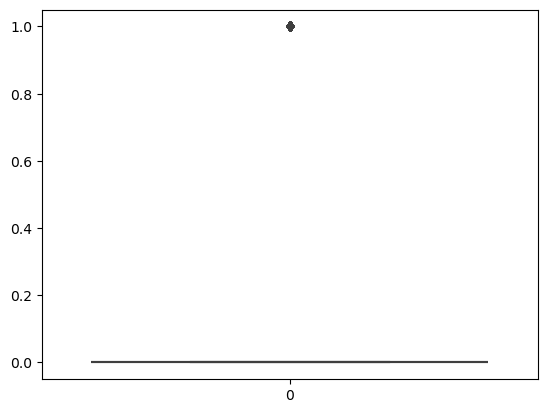

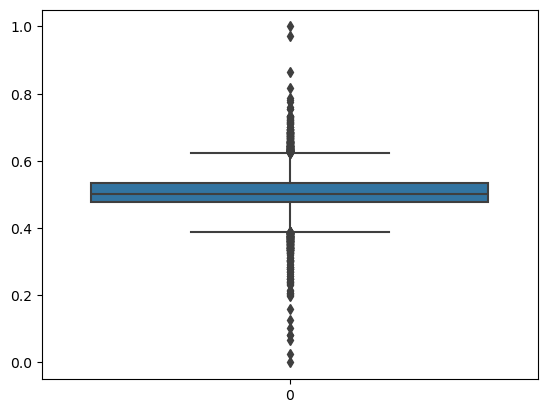

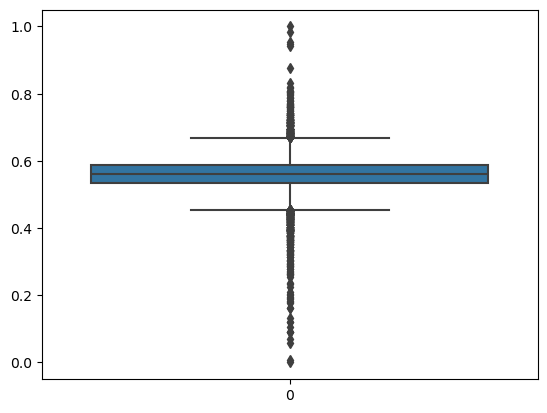

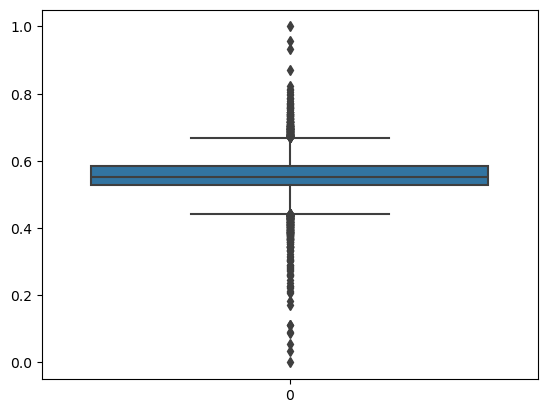

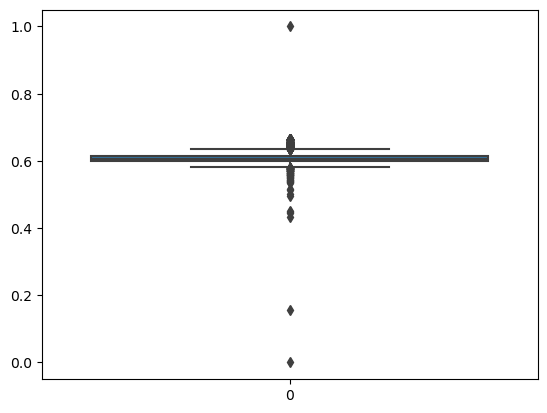

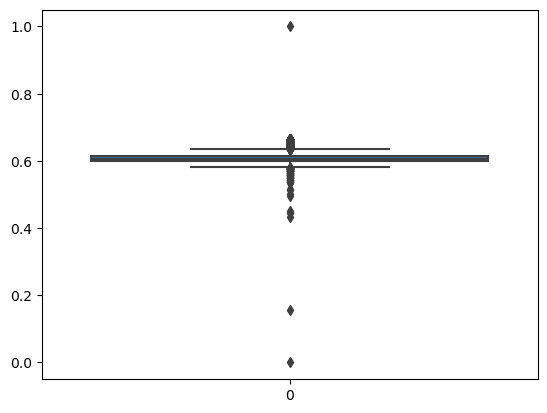

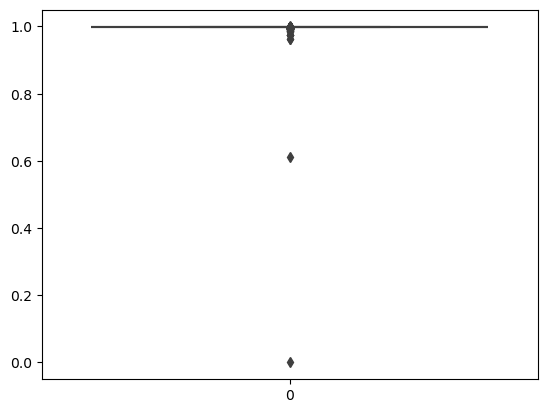

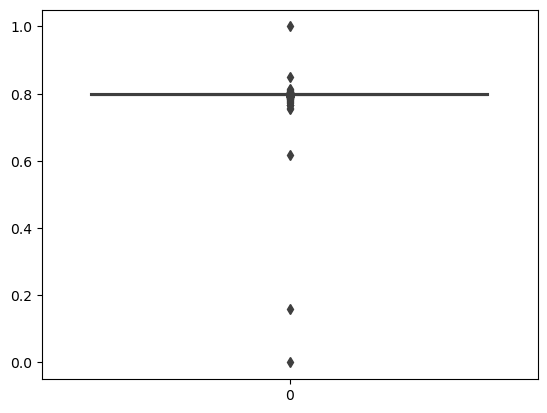

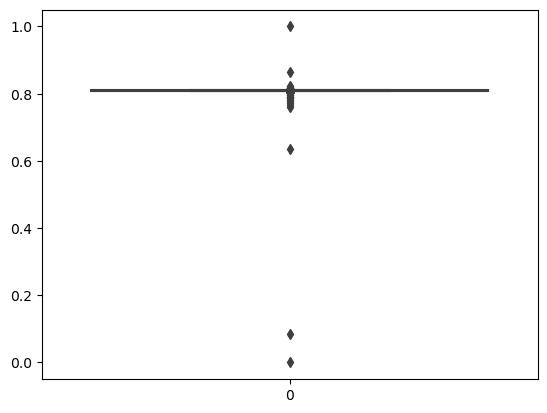

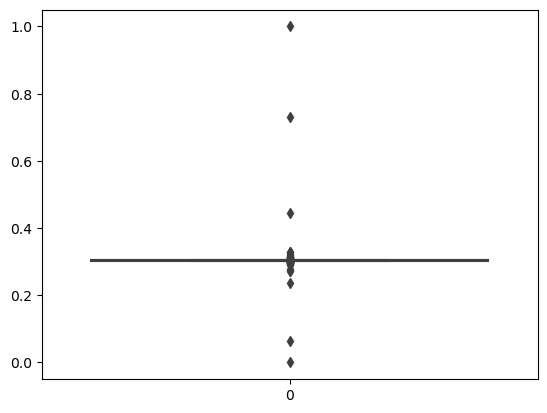

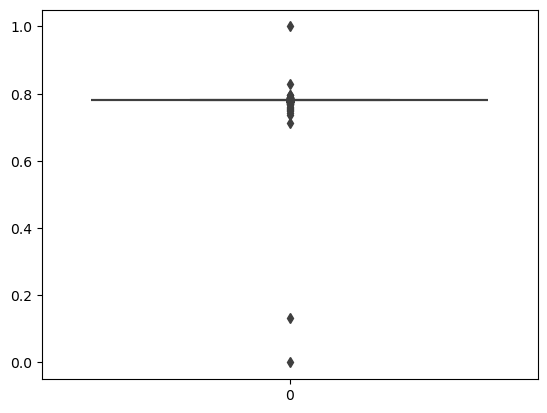

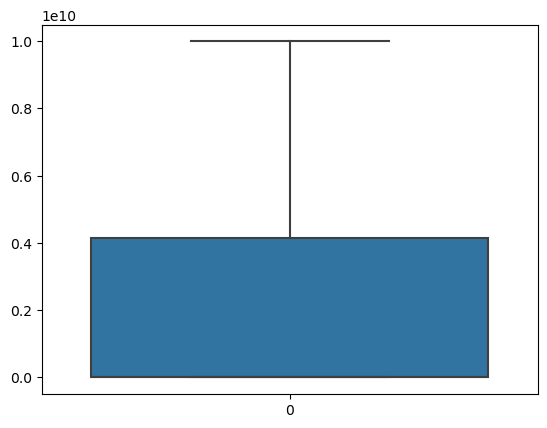

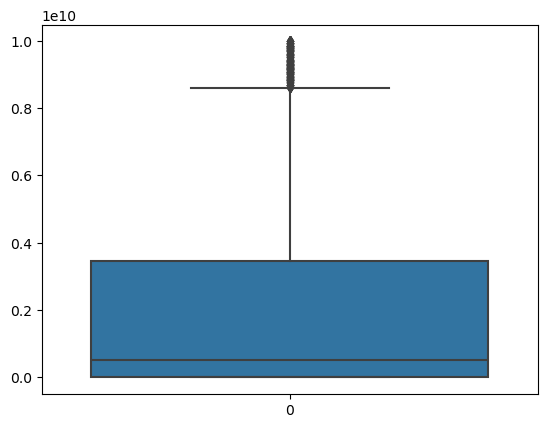

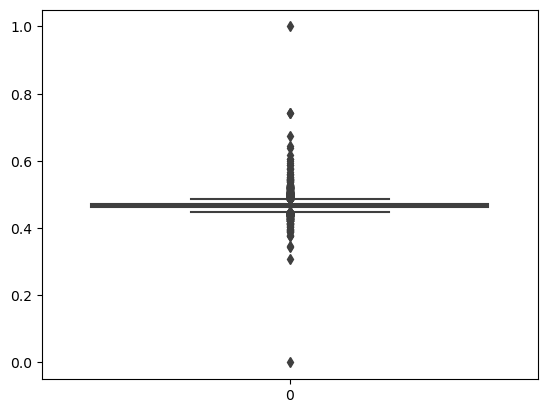

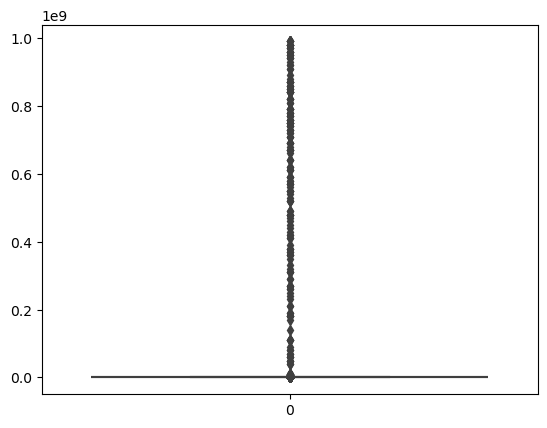

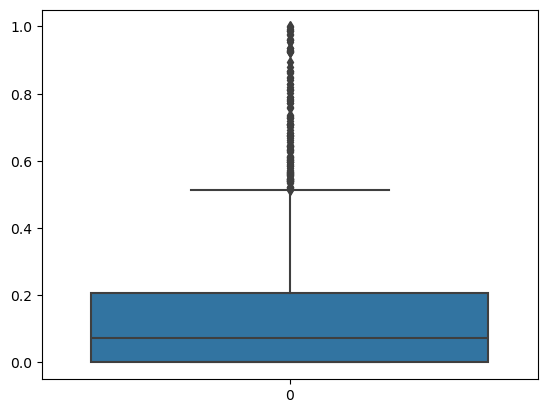

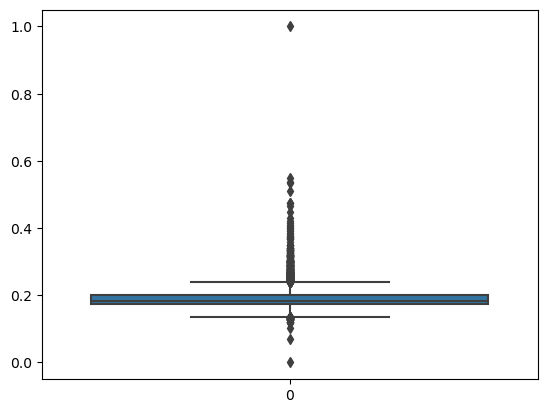

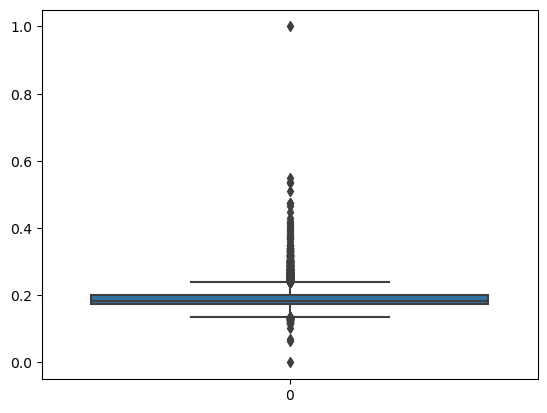

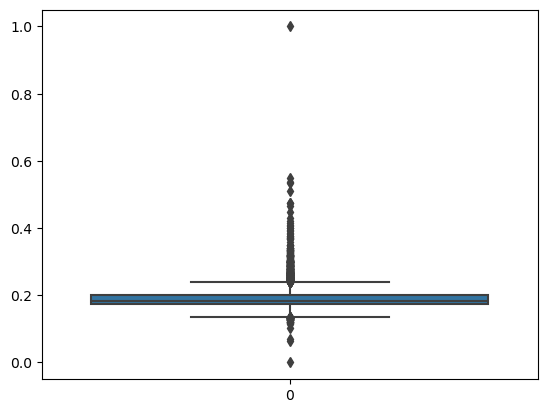

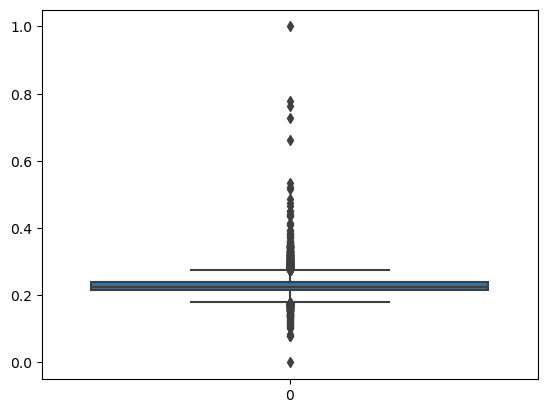

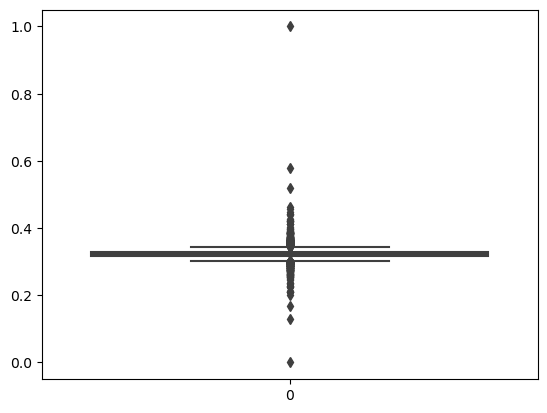

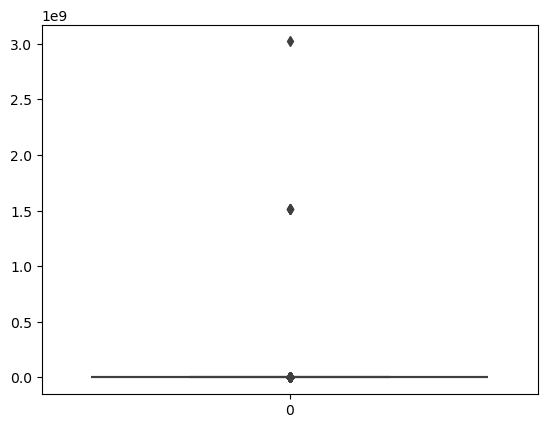

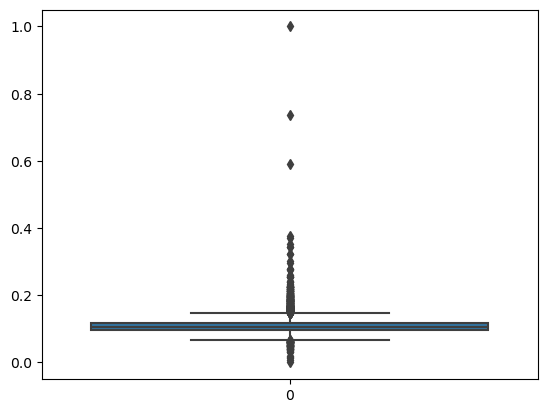

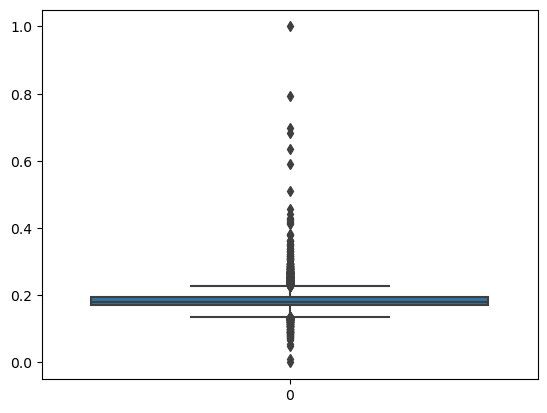

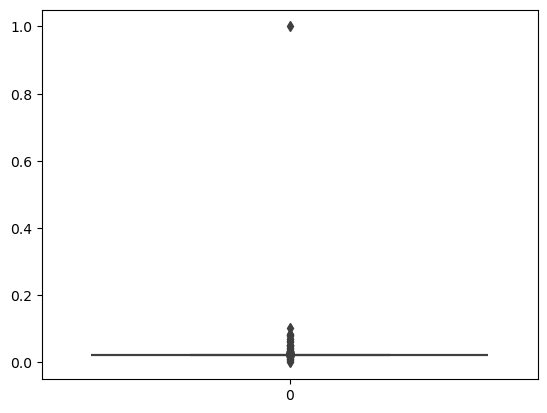

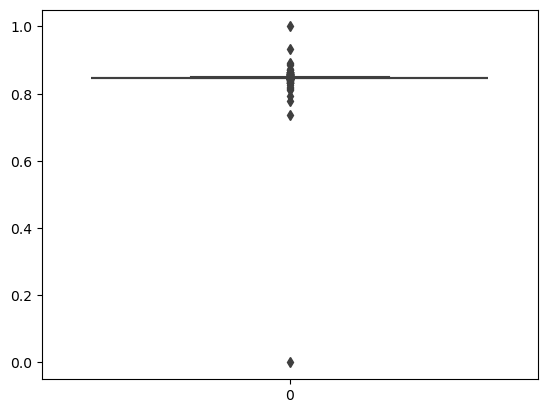

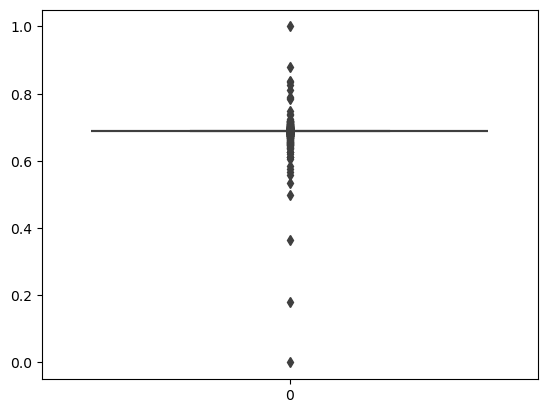

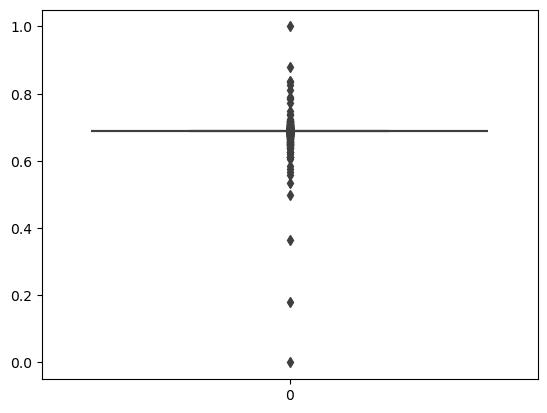

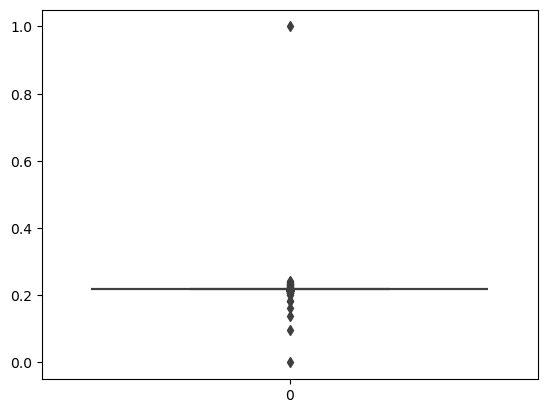

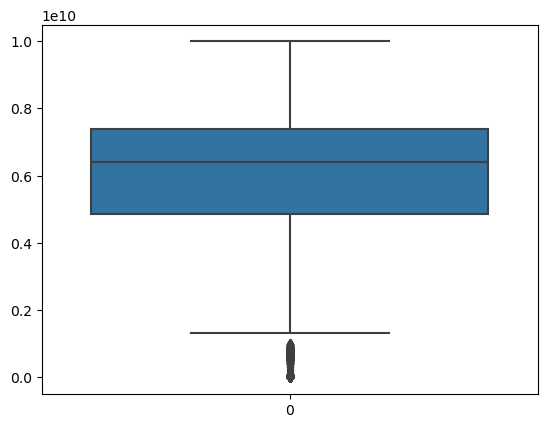

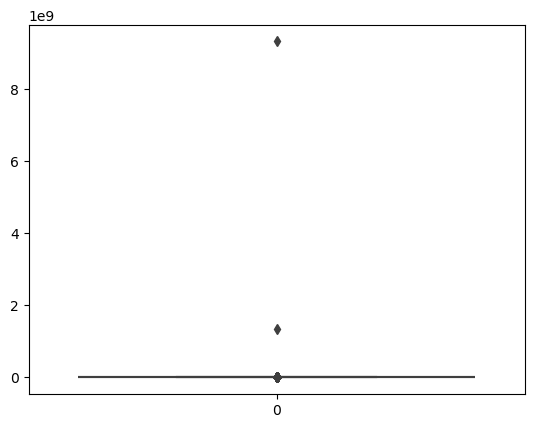

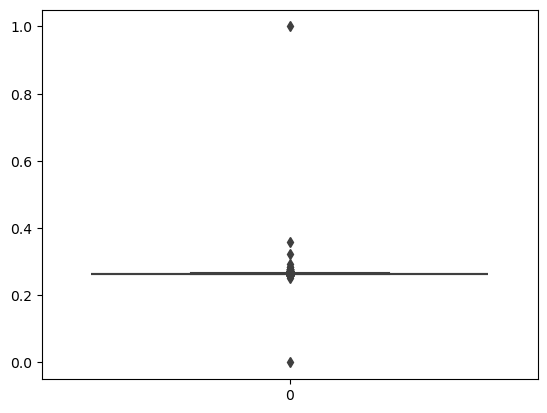

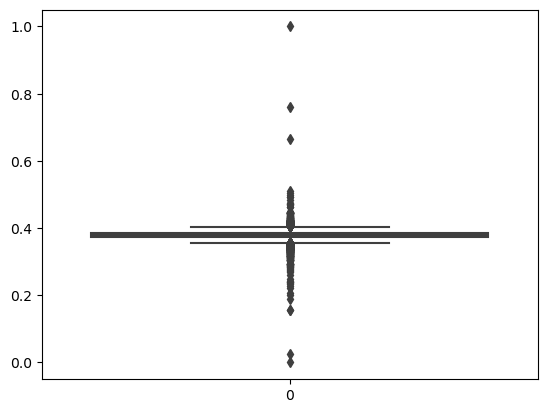

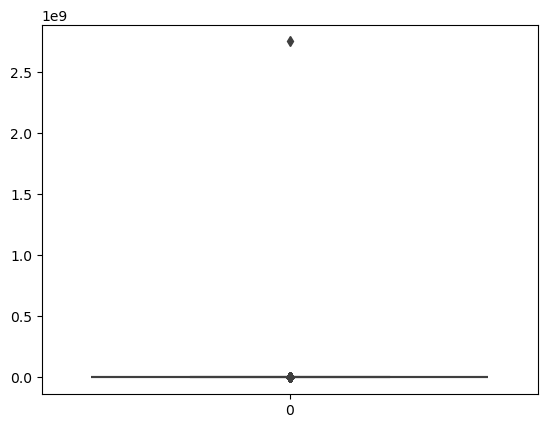

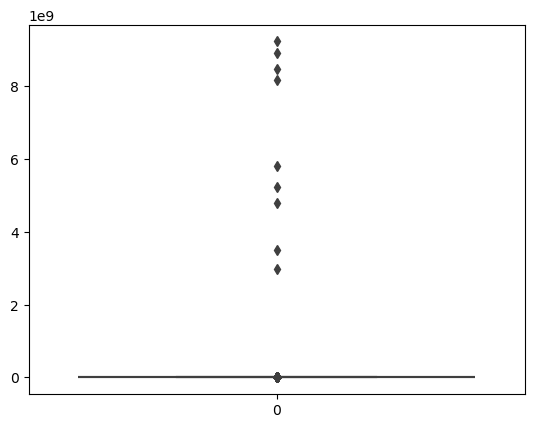

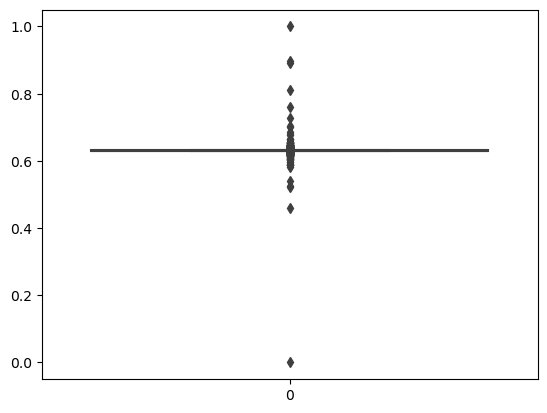

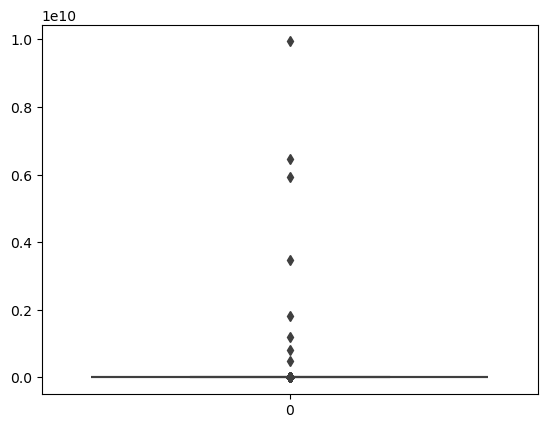

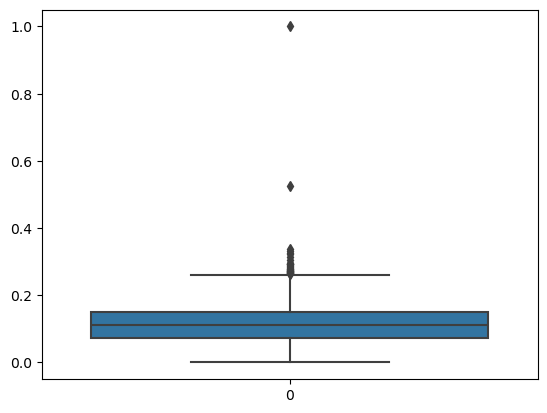

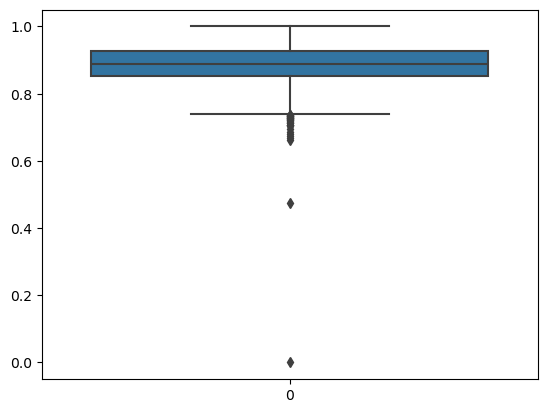

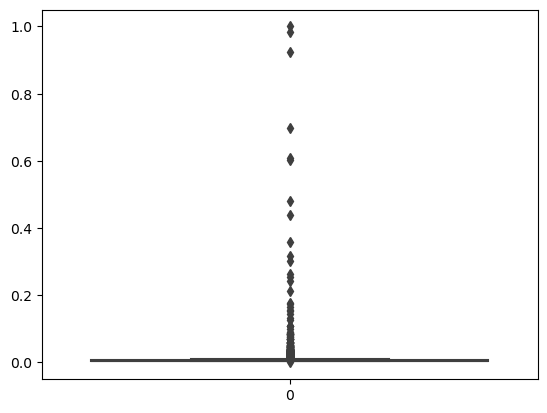

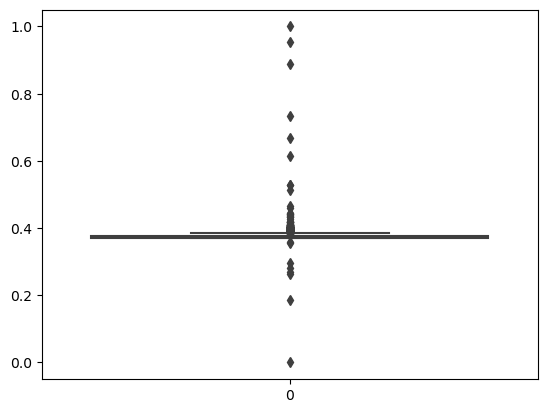

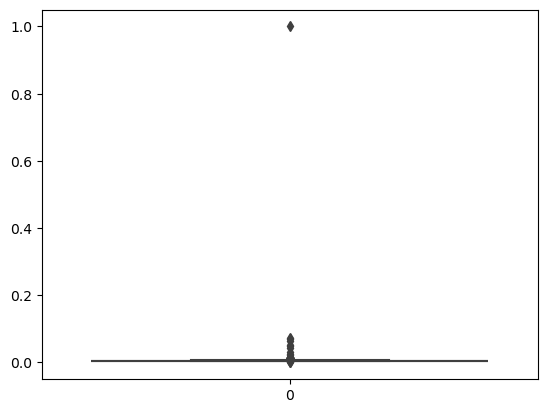

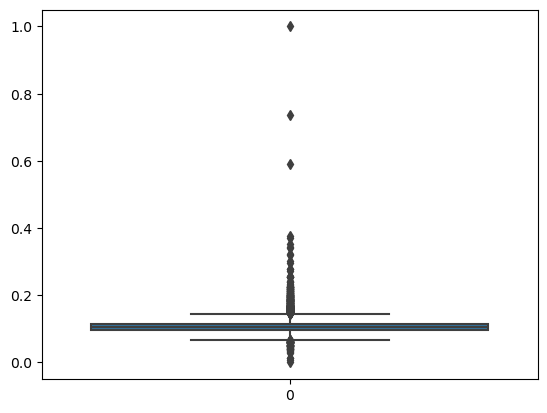

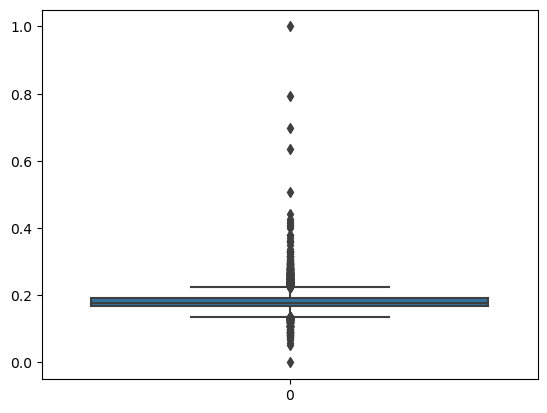

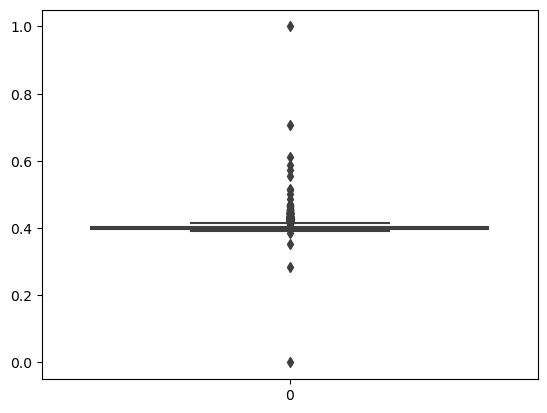

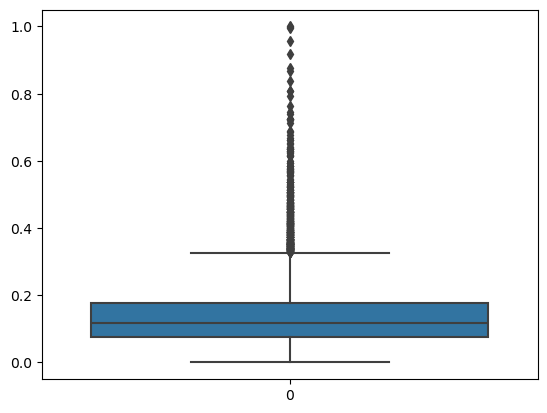

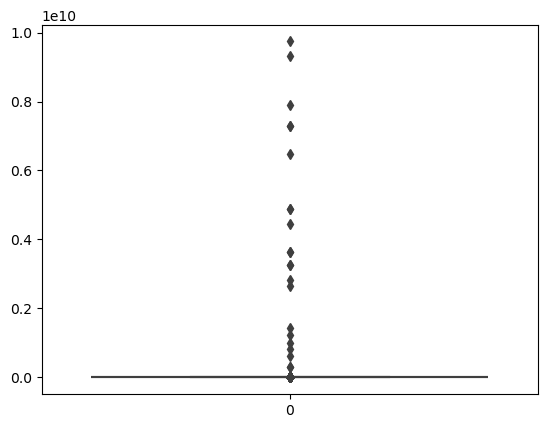

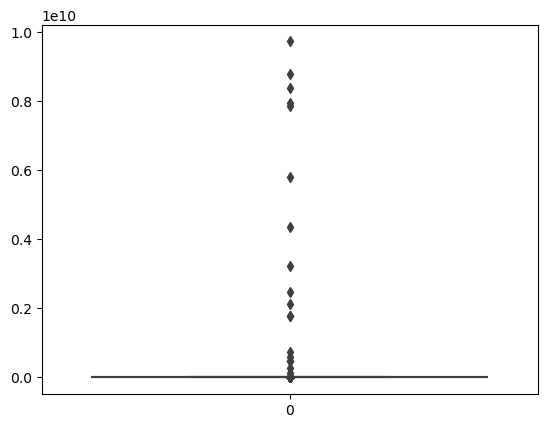

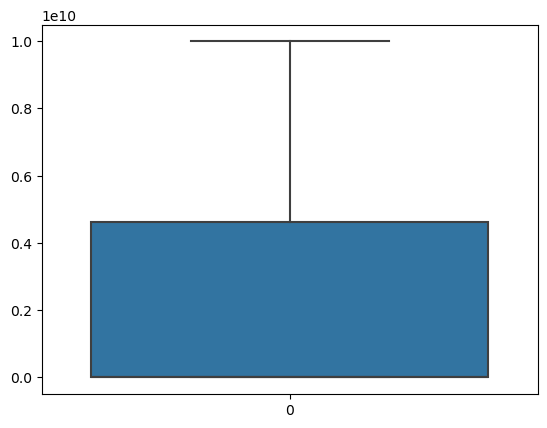

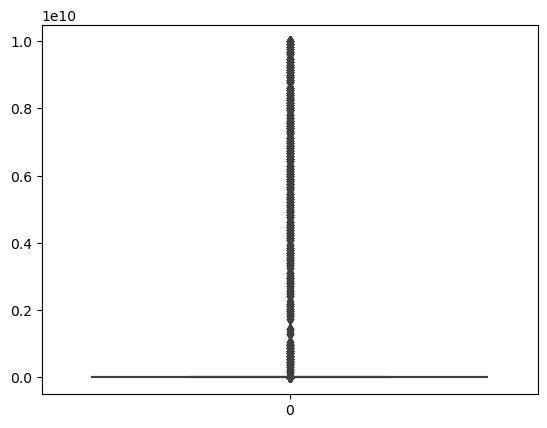

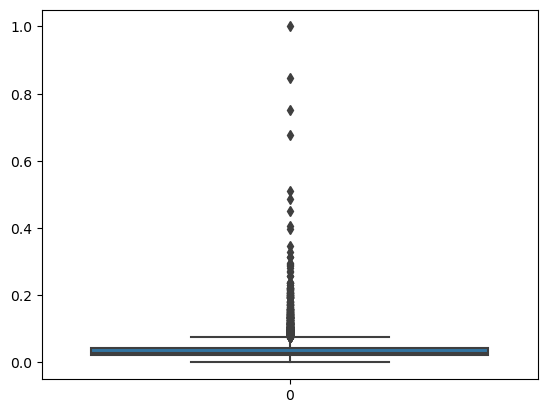

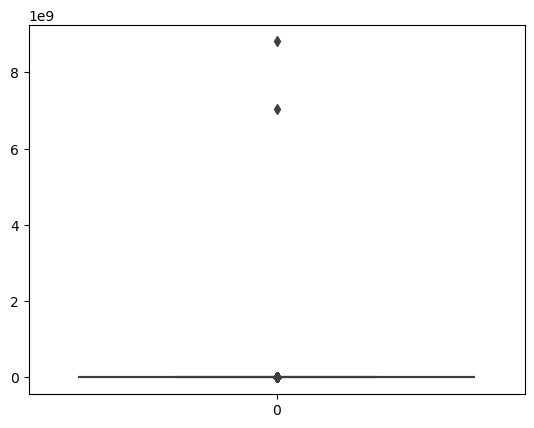

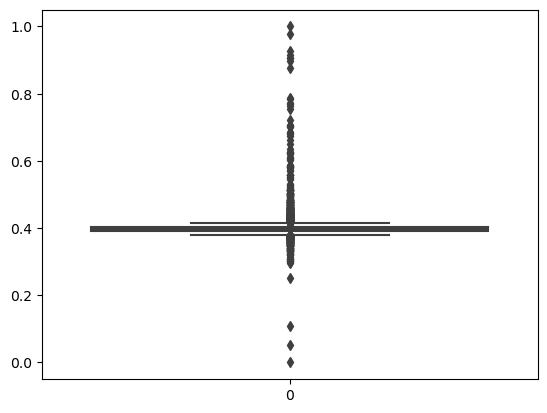

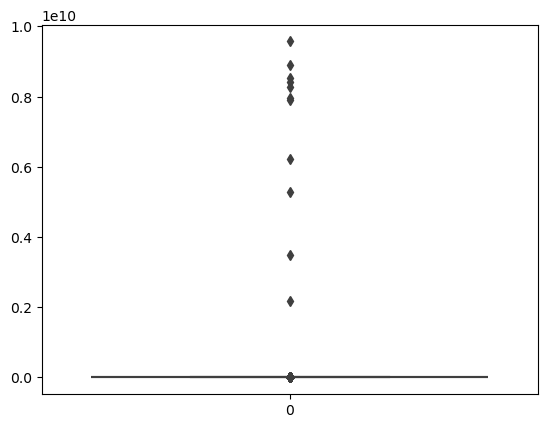

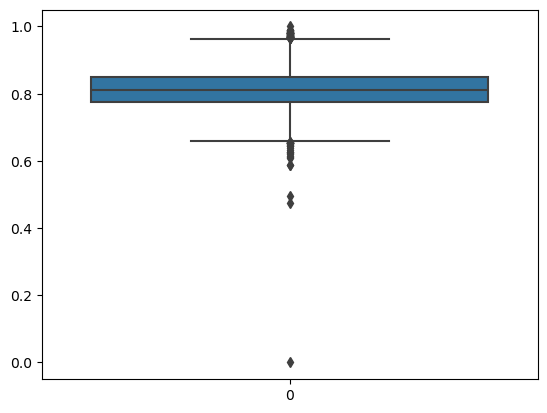

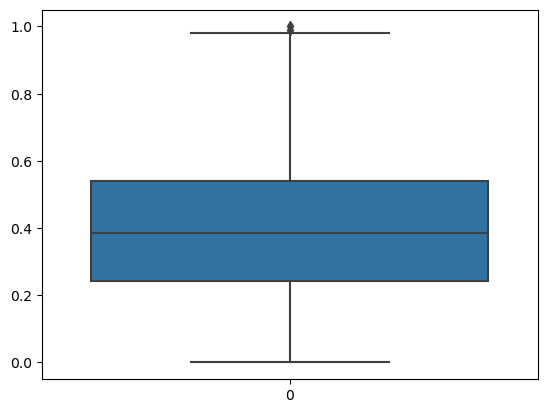

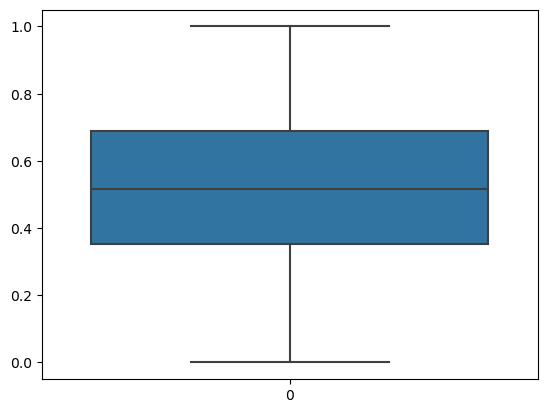

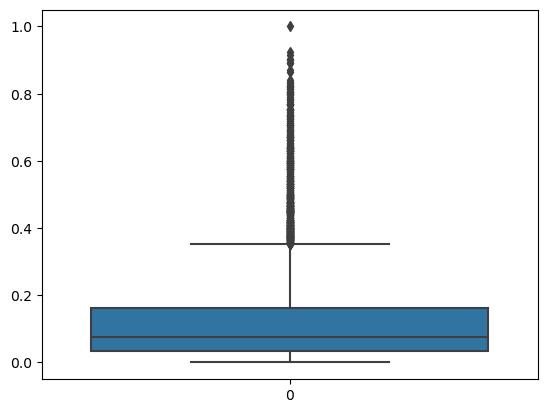

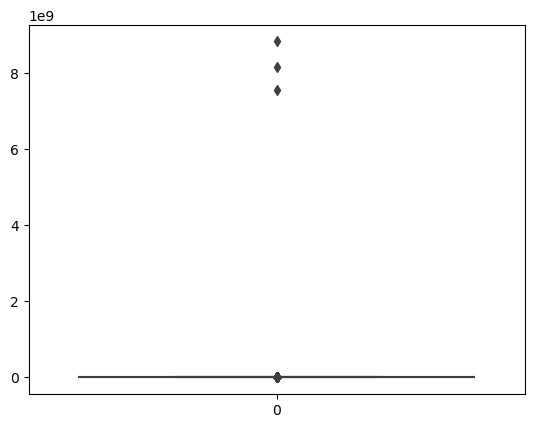

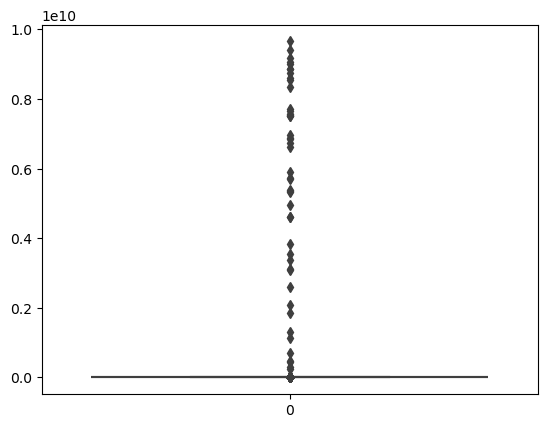

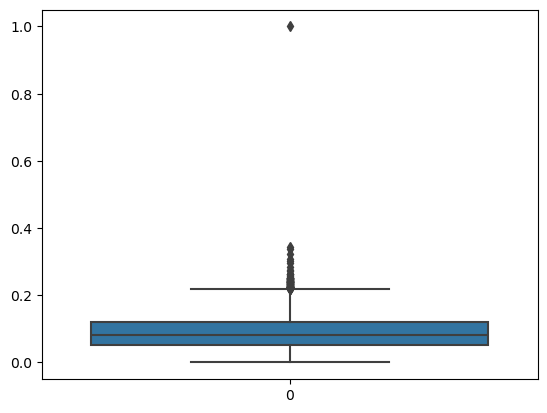

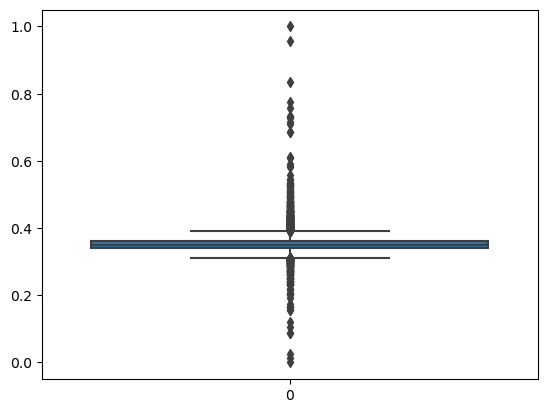

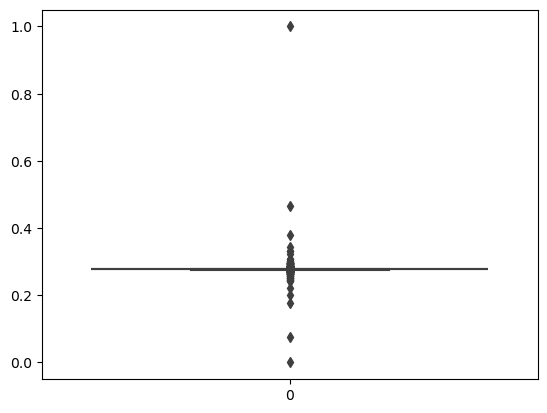

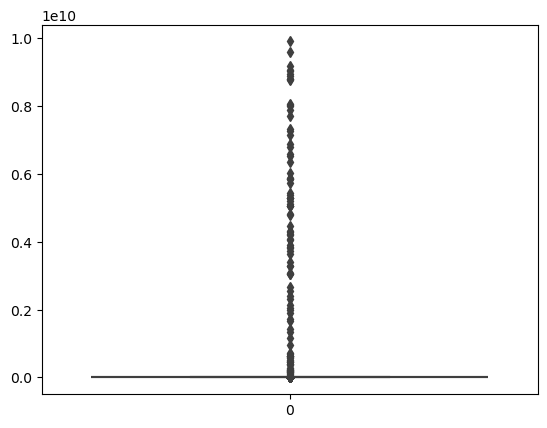

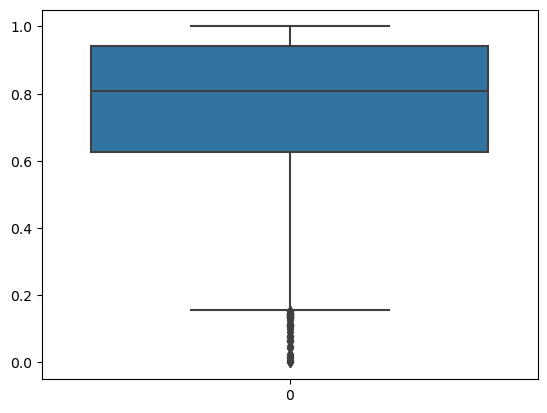

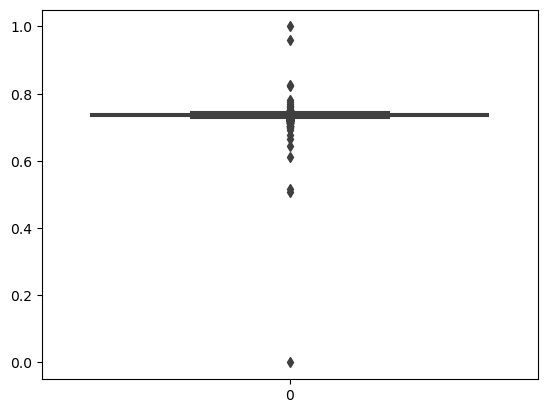

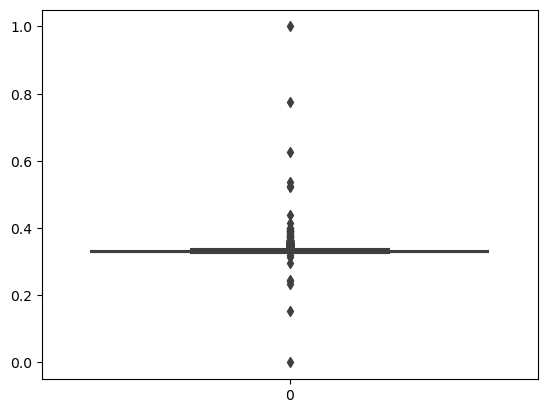

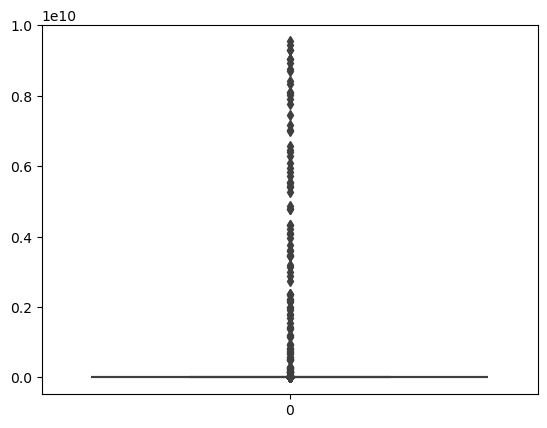

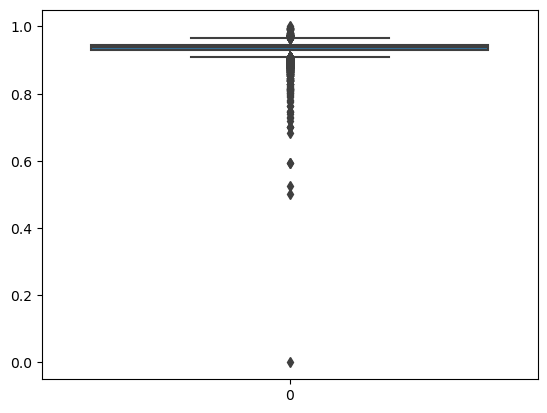

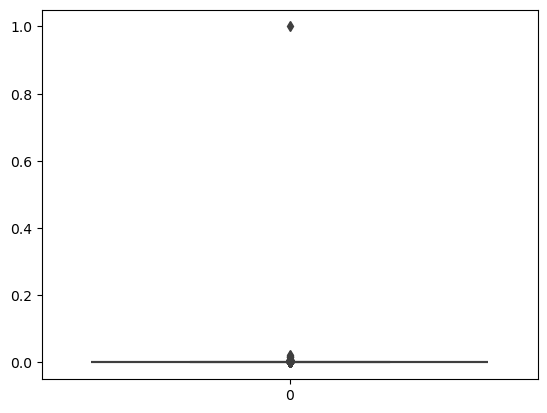

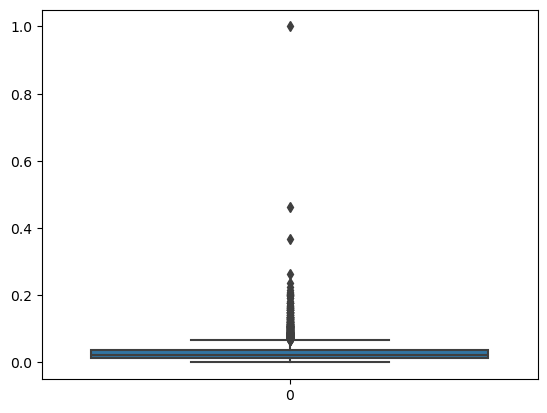

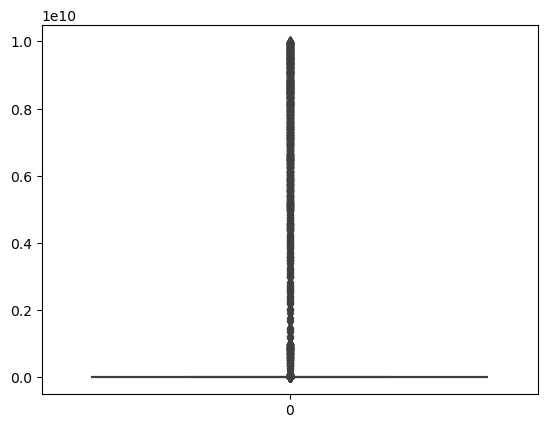

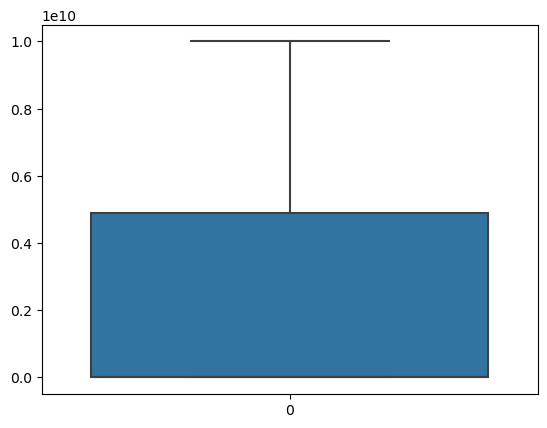

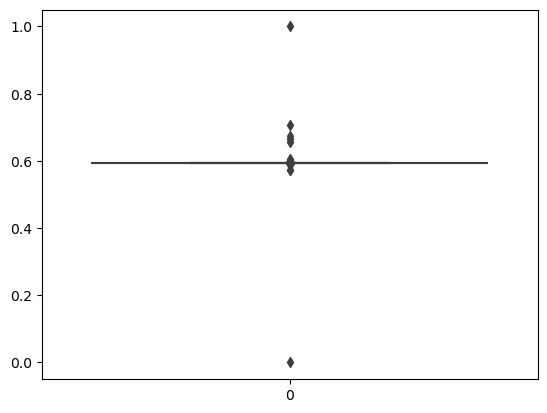

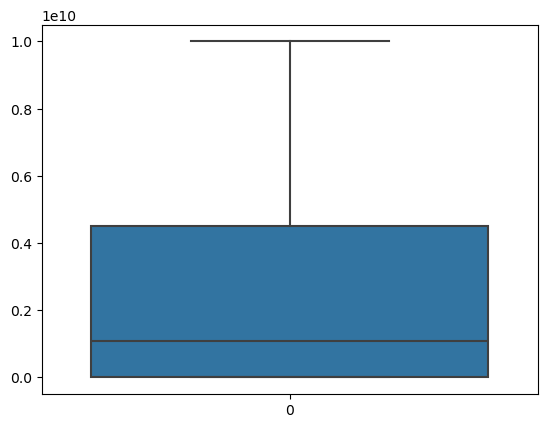

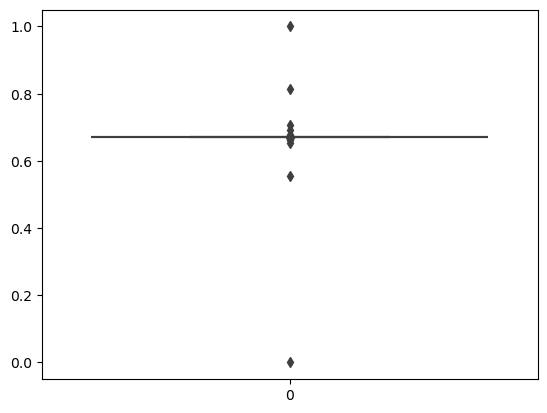

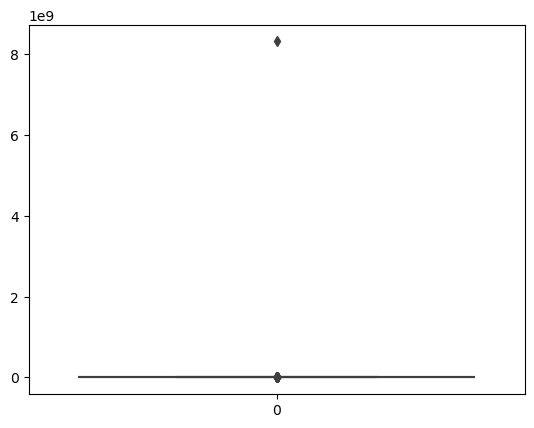

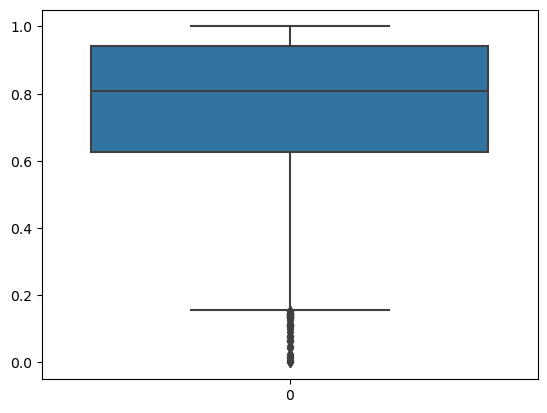

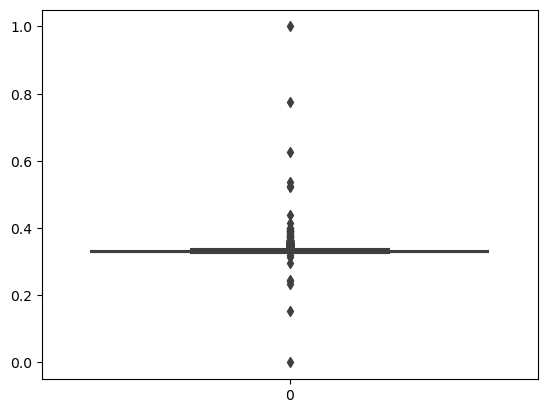

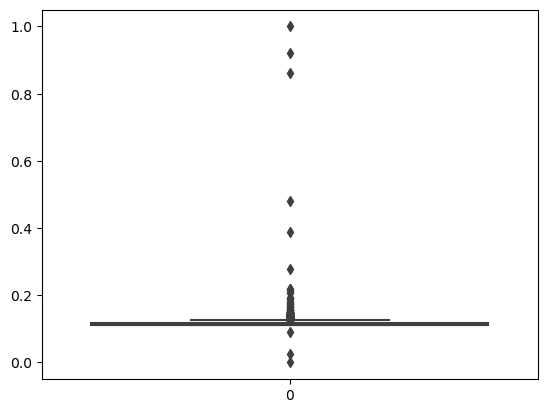

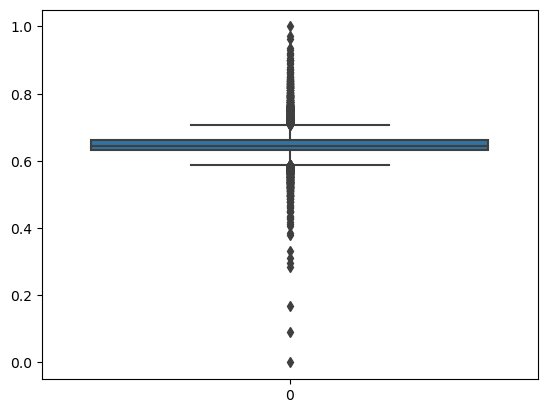

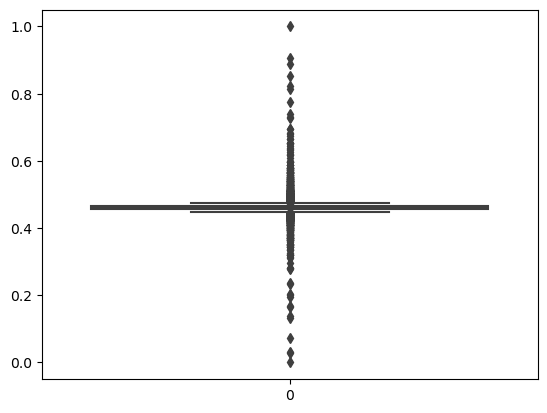

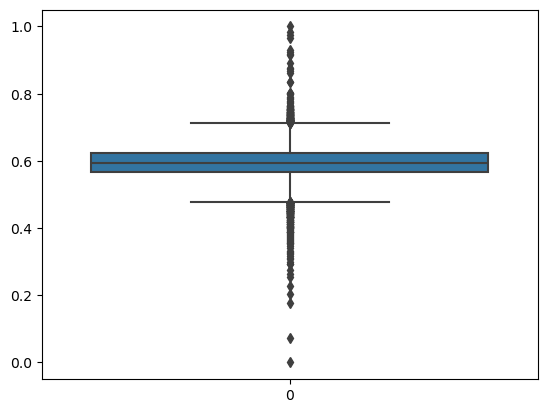

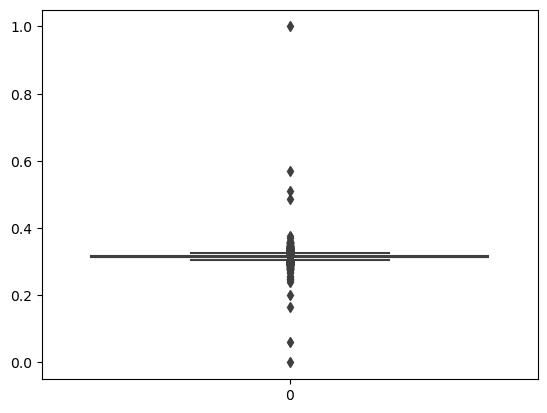

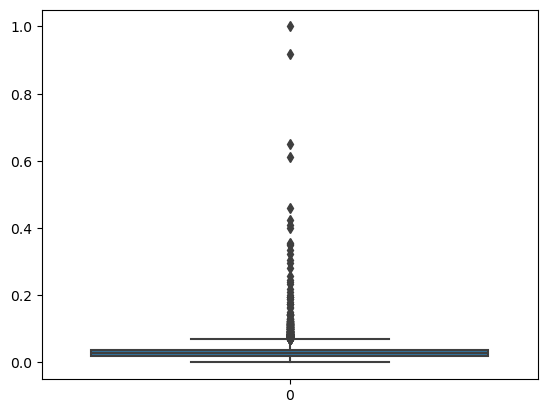

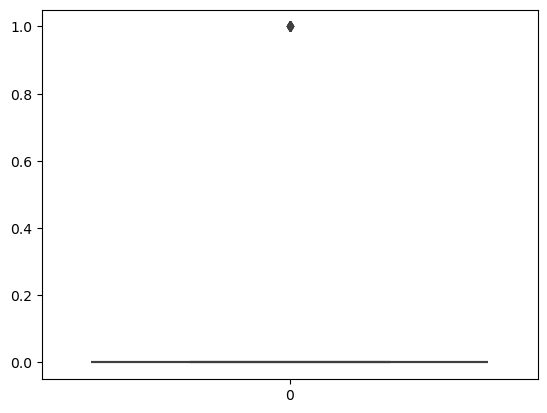

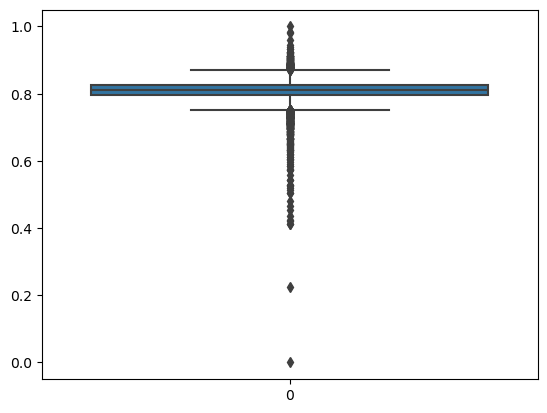

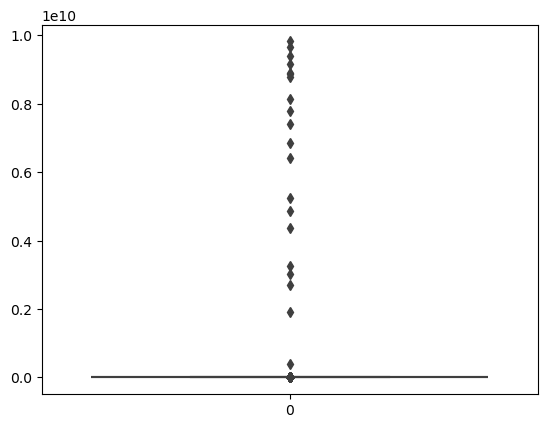

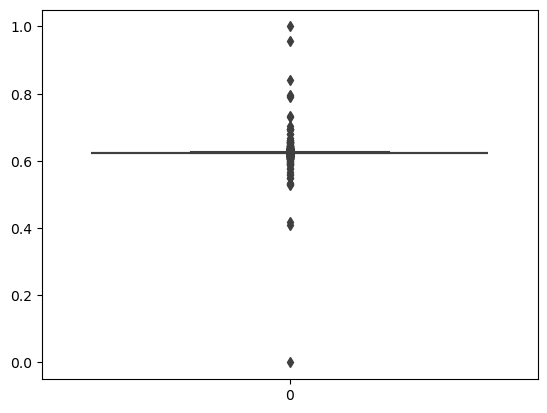

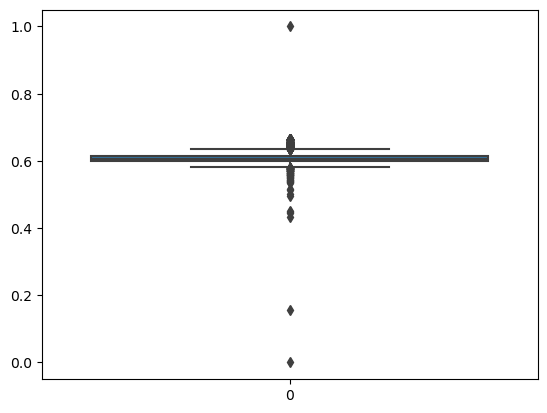

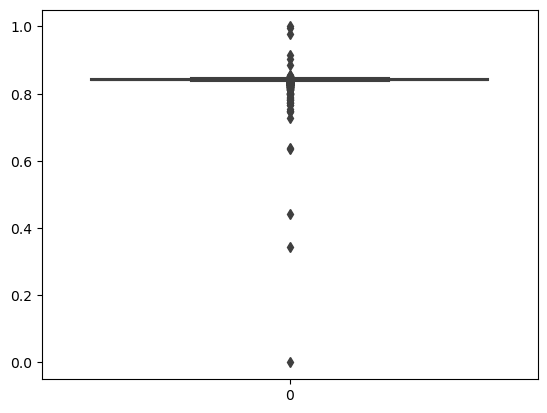

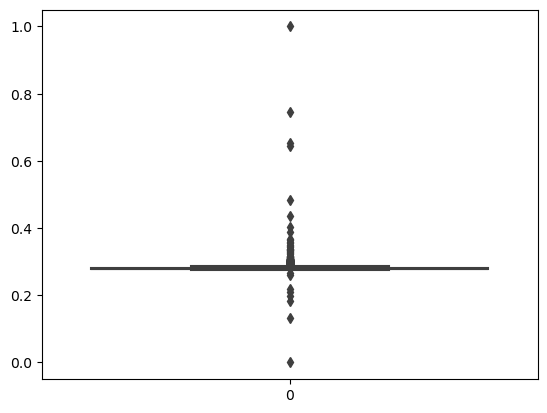

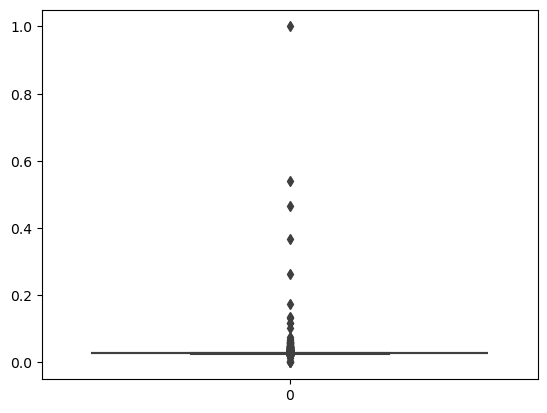

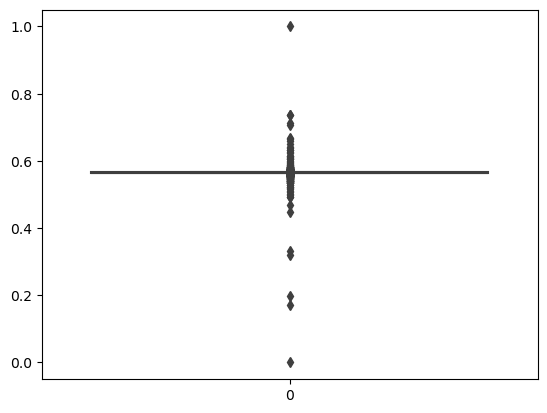

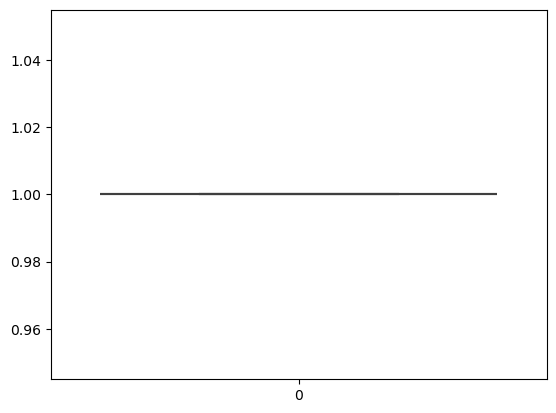

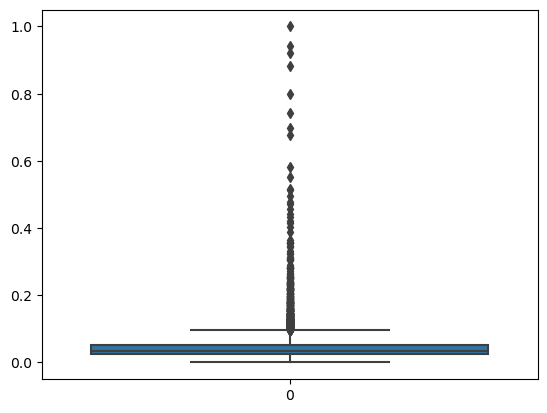

In [228]:
for col in df.columns:
    sns.boxplot(df[col])
    
    plt.show()

In [229]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype == 'float64':  # Ensure the column is float
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("================================================================================")

# Detect outliers in float columns
outliers = detect_outliers_iqr(df)

# Print the number of outliers for each float feature
count = 0
for feature, outlier_data in outliers.items():
    print(f'{feature}: {len(outlier_data)} outliers')
    if len(outlier_data) > 0:
        count += 1

print("=============================================================================================")

# Function to cap outliers for float columns using IQR
def cap_outliers(df):
    for column in df.columns:
        if df[column].dtype == 'float64':  # Ensure the column is float
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Handle outliers in float columns
data_cleaned = cap_outliers(df)

# Verify the changes
print("==============================================================================")
print("Outliers have been capped.")
data_cleaned.describe()
print("=============================================================================")
print("Outliers Found In:", count, "columns")

Cost of Interest-bearing Debt: 391 outliers
Cash Reinvestment Ratio: 561 outliers
Current Ratio: 432 outliers
Acid Test: 320 outliers
Interest Expenses/Total Revenue: 318 outliers
Total Liability/Equity Ratio: 716 outliers
Liability/Total Assets: 773 outliers
Interest-bearing Debt/Equity: 867 outliers
Contingent Liability/Equity: 1094 outliers
Operating Income/Capital: 806 outliers
Pretax Income/Capital: 0 outliers
Working Capital to Total Assets: 182 outliers
Quick Assets/Total assets: 576 outliers
Current Assets/Total Assets: 396 outliers
Cash/Total Assets: 120 outliers
Quick Assets/Current Liability: 457 outliers
Cash/Current Liability: 464 outliers
Current Liability to Assets: 465 outliers
Operating Funds to Liability: 508 outliers
Inventory/Working Capital: 532 outliers
Inventory/Current Liability: 478 outliers
Current Liabilities/Liability: 442 outliers
Working Capital/Equity: 511 outliers
Current Liabilities/Equity: 814 outliers
Long-term Liability to Current Assets: 1008 outlie

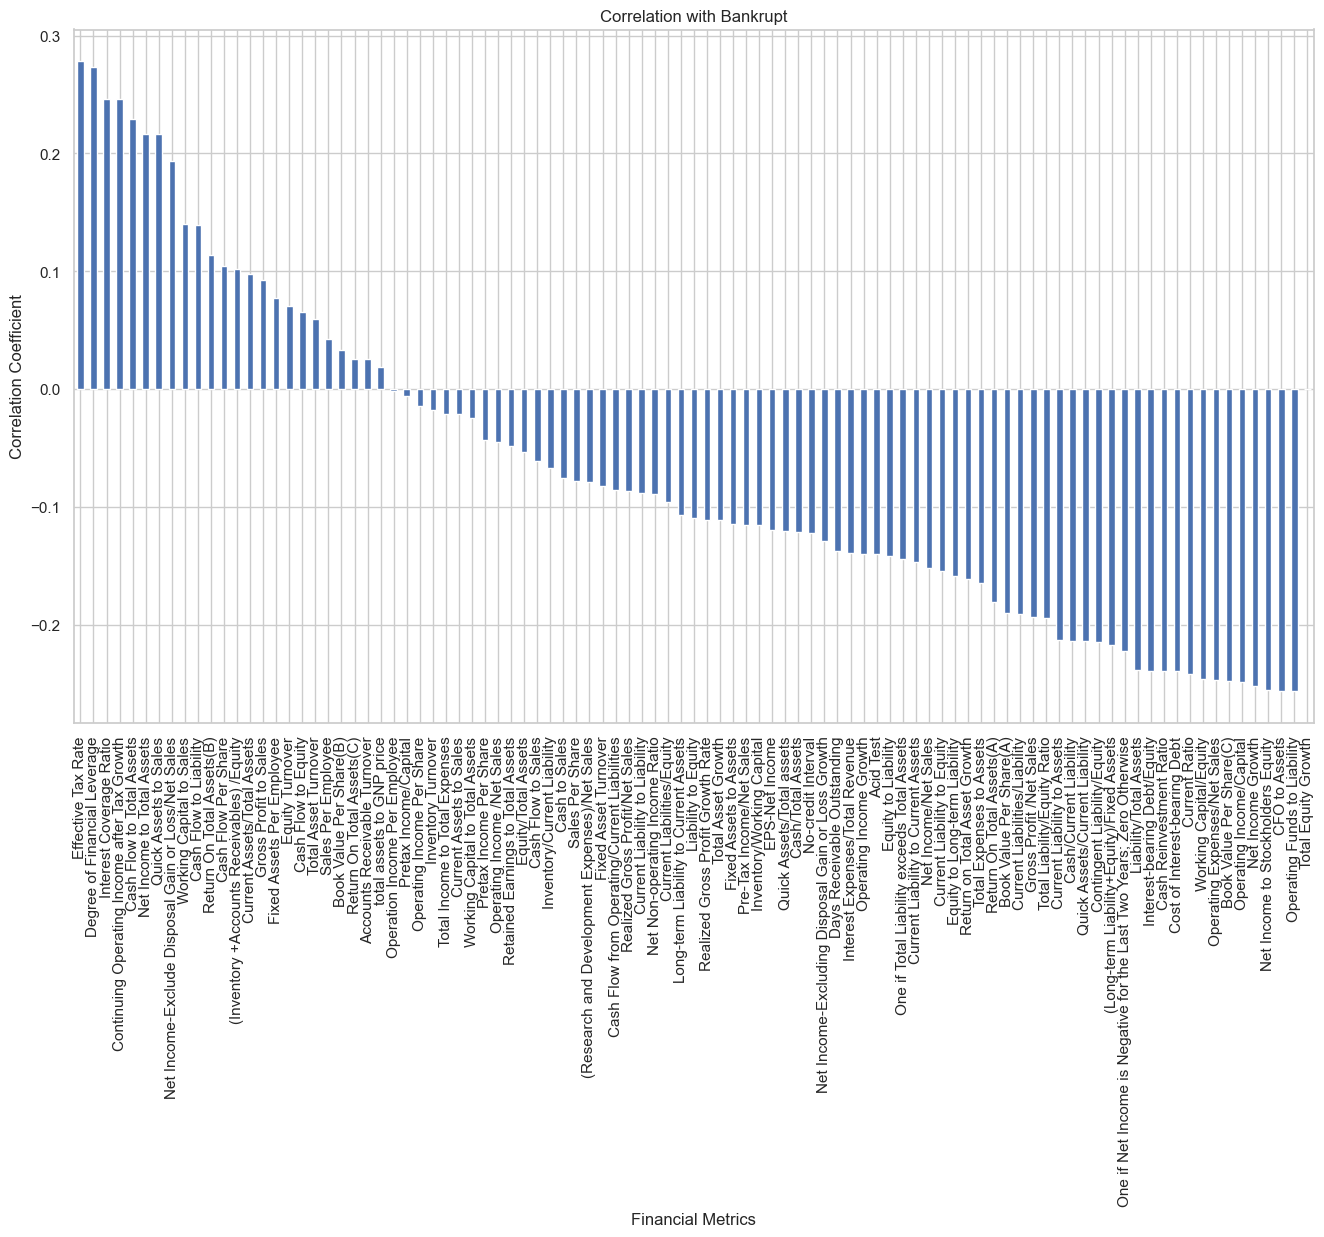

In [232]:
correlation_matrix = df.corr()

# Extract correlation coefficients related to 'Bankrupt'
bankrupt_correlation = correlation_matrix['Bankrupt'].drop('Bankrupt')

# Sort the correlations
sorted_correlations = bankrupt_correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(16, 9))
sorted_correlations.plot(kind='bar')
plt.title('Correlation with Bankrupt')
plt.xlabel('Financial Metrics')
plt.ylabel('Correlation Coefficient')
plt.show()

In [233]:
df.describe()   # descriptive statistics

,Bankrupt,Cost of Interest-bearing Debt,Cash Reinvestment Ratio,Current Ratio,Acid Test,Interest Expenses/Total Revenue,Total Liability/Equity Ratio,Liability/Total Assets,Interest-bearing Debt/Equity,Contingent Liability/Equity,...,CFO to Assets,Cash Flow to Equity,Realized Gross Profit Growth Rate,Operating Income Growth,Net Income Growth,Continuing Operating Income after Tax Growth,Net Income-Excluding Disposal Gain or Loss Growth,Total Asset Growth,Total Equity Growth,Return on Total Asset Growth
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505667,0.560507,0.554691,0.607834,0.607812,0.999028,0.797467,0.809378,0.303526,...,0.810070,0.003750,0.623890,0.607833,0.841060,0.279689,0.026846,0.565422,1.0,0.042019
std,0.176710,0.051483,0.050087,0.050277,0.010758,0.010725,0.000120,0.000189,0.000157,0.000124,...,0.027735,0.003805,0.000553,0.010758,0.002057,0.003566,0.000138,0.000627,0.0,0.023671
min,0.000000,0.387973,0.455122,0.442034,0.580240,0.580321,0.998781,0.797096,0.809075,0.303288,...,0.752193,0.000000,0.622838,0.580237,0.836752,0.270187,0.026608,0.564309,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,0.000904,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,0.002085,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,0.005270,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,0.624116,0.669579,0.669348,0.634118,0.633954,0.999282,0.797868,0.809706,0.303764,...,0.871012,0.011819,0.624966,0.634119,0.845720,0.288207,0.027096,0.566574,1.0,0.095380


## Visualize feature distributions

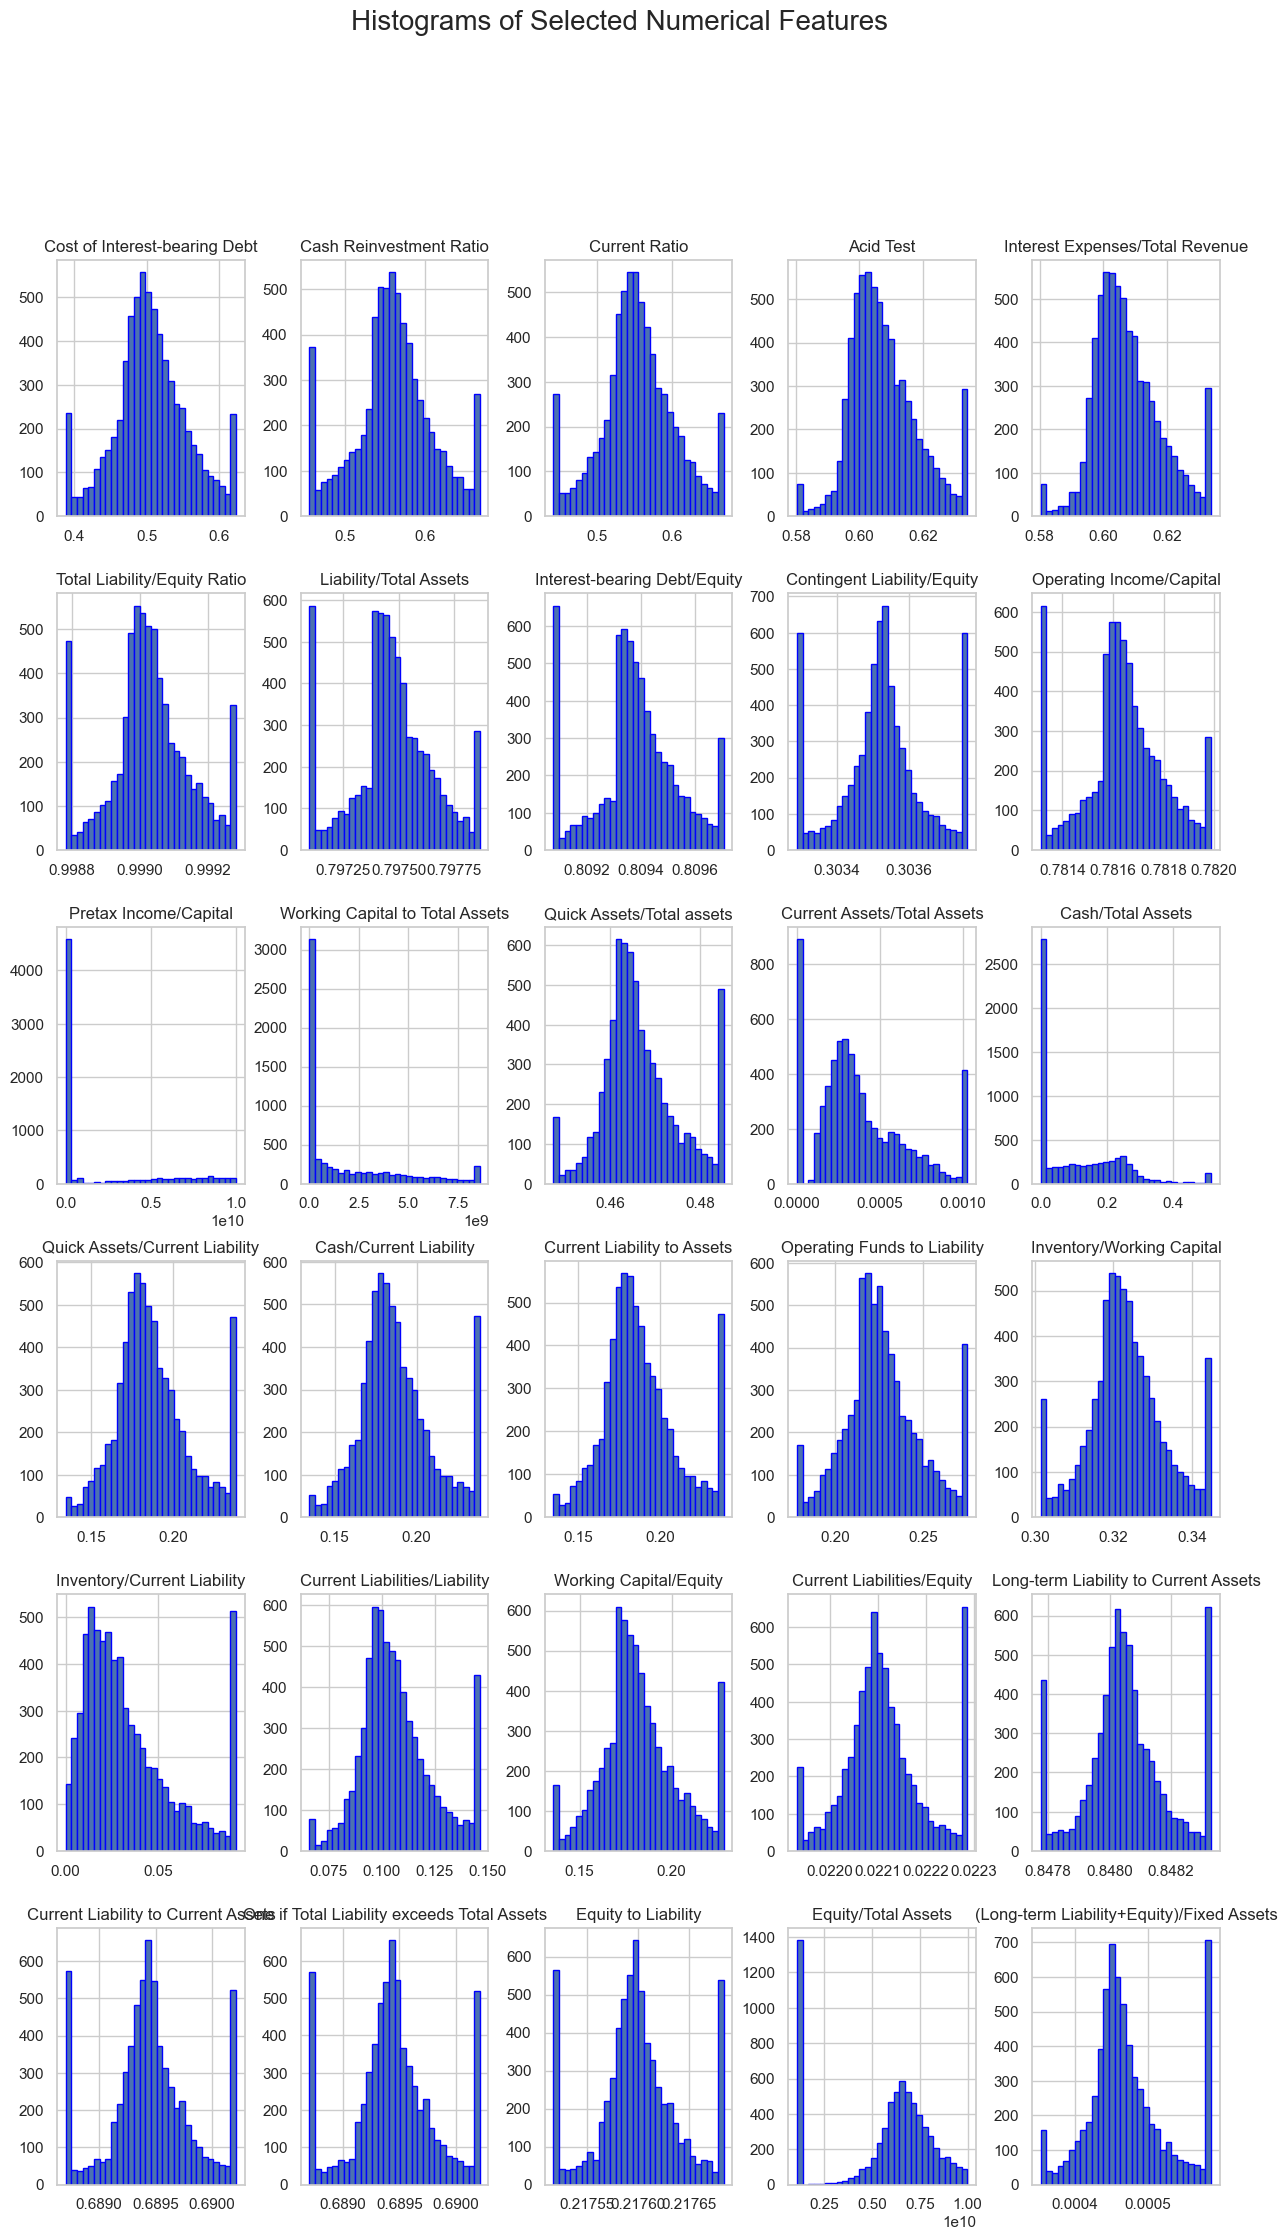

In [238]:
#Visualize feature distributions 
# Select a subset of features for visualization
selected_features = df.columns[1:31] 

# Plotting the histograms for selected numerical features
df[selected_features].hist(figsize=(15, 25), bins=30, edgecolor='blue')
plt.suptitle('Histograms of Selected Numerical Features', fontsize=20)
plt.show()

In [246]:
## Visualize target variable

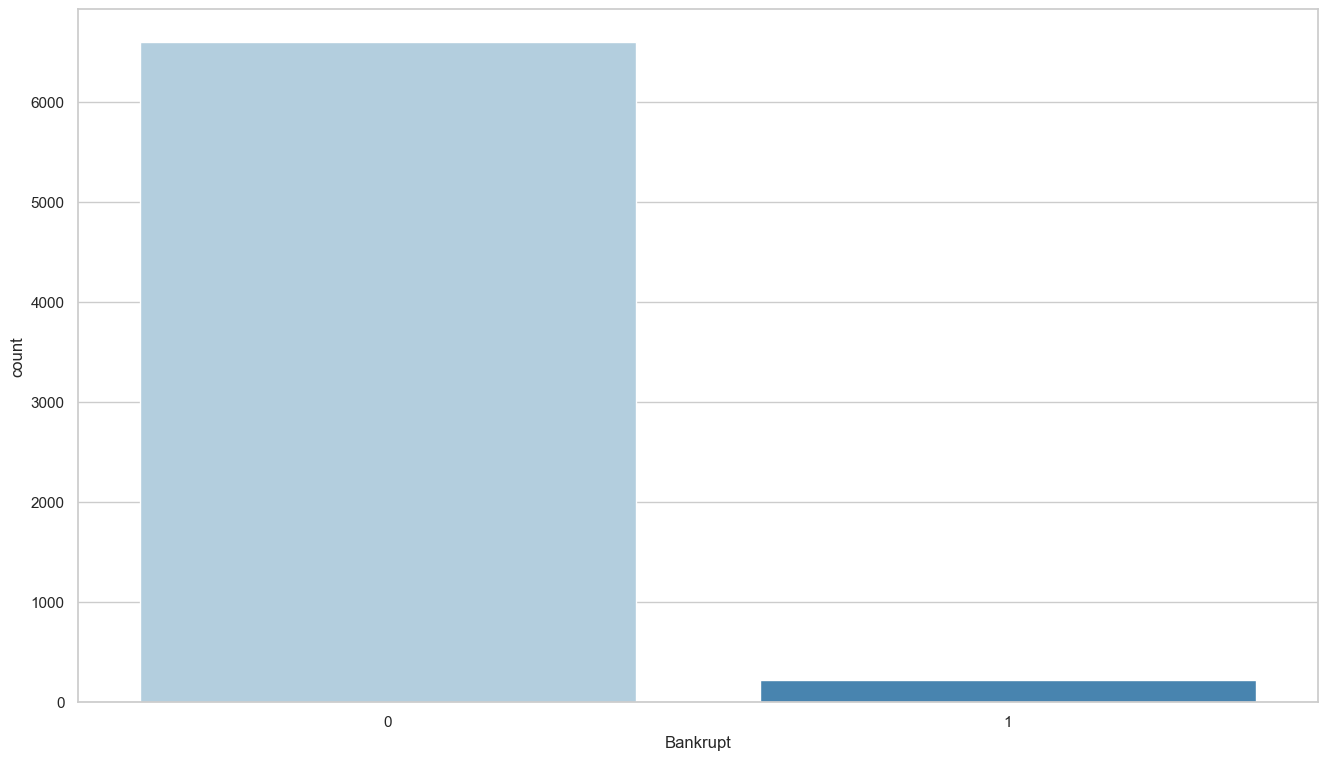

In [247]:

plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt',data = df,palette ='Blues' )
plt.show()

In [251]:
#hypothesis testing
from scipy import stats
# Perform t-tests for each feature
# List to store significant features
significant_features = []

# Perform t-tests for each feature
for column in df.columns[:-1]:  # Exclude the target variable
    t_stat, p_value = stats.ttest_ind(df[column][df['Bankrupt'] == 1], df[column][df['Bankrupt'] == 0])
    if p_value < 0.05:
        significant_features.append(column)

# Display significant features
significant_features

['Bankrupt',
 'Cost of Interest-bearing Debt',
 'Cash Reinvestment Ratio',
 'Current Ratio',
 'Acid Test',
 'Interest Expenses/Total Revenue',
 'Total Liability/Equity Ratio',
 'Liability/Total Assets',
 'Interest-bearing Debt/Equity',
 'Contingent Liability/Equity',
 'Operating Income/Capital',
 'Working Capital to Total Assets',
 'Quick Assets/Total assets',
 'Current Assets/Total Assets',
 'Cash/Total Assets',
 'Quick Assets/Current Liability',
 'Cash/Current Liability',
 'Current Liability to Assets',
 'Operating Funds to Liability',
 'Inventory/Working Capital',
 'Inventory/Current Liability',
 'Current Liabilities/Liability',
 'Working Capital/Equity',
 'Current Liabilities/Equity',
 'Long-term Liability to Current Assets',
 'Current Liability to Current Assets',
 'One if Total Liability exceeds Total Assets',
 'Equity to Liability',
 'Equity/Total Assets',
 '(Long-term Liability+Equity)/Fixed Assets',
 'Fixed Assets to Assets',
 'Current Liability to Liability',
 'Current Liabil

## Modelling

In [262]:
selected_features = [
    'Cost of Interest-bearing Debt',
    'Cash Reinvestment Ratio',
    'Current Ratio',
    'Acid Test',
    'Interest Expenses/Total Revenue',
    'Total Liability/Equity Ratio',
    'Liability/Total Assets',
    'Interest-bearing Debt/Equity',
    'Contingent Liability/Equity',
    'Operating Income/Capital'
]
X = df[selected_features]
y = df['Bankrupt']

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (for intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Train a logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)  # logistic regressio

         Current function value: 2.637298
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5444
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  -18.09
Time:                        21:39:55   Log-Likelihood:                -14386.
converged:                      False   LL-Null:                       -753.53
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.418e+05   6.51e+04     -3.714      0.000   -3.69e+05   -1.14e+05
Co